# Minerals
This Jupyter Notebook uses mineral data that has been [scraped with a python script](https://github.com/florianneukirchen/scrape_mineral_data) from [Wikipedia](https://github.com/florianneukirchen/jupyter-notebooks/blob/main/minerals-cleaned.csv). I slightly cleaned the data of my original [mineral.csv](https://raw.githubusercontent.com/florianneukirchen/scrape_mineral_data/main/minerals.csv) and dropped some columns. Beware of missing data and unexpected values.

Data: [minerals-cleaned.csv](https://github.com/florianneukirchen/jupyter-notebooks/blob/main/minerals-cleaned.csv), © Wikipedia editors and contributors, [Creative Commons Attribution-ShareAlike 3.0 Unported License](https://en.wikipedia.org/wiki/Wikipedia:Text_of_the_Creative_Commons_Attribution-ShareAlike_3.0_Unported_License).

Notebook by [Florian Neukirchen](https://www.riannek.de/).

In [7]:
import re
import plotly.express as px
import pandas as pd

minerals = pd.read_csv("minerals-cleaned.csv")
minerals.head()

name                                            url  \
0       Abelsonite       https://en.wikipedia.org/wiki/Abelsonite   
1  Abenakiite-(Ce)  https://en.wikipedia.org/wiki/Abenakiite-(Ce)   
2     Abernathyite     https://en.wikipedia.org/wiki/Abernathyite   
3         Abhurite         https://en.wikipedia.org/wiki/Abhurite   
4       Abramovite       https://en.wikipedia.org/wiki/Abramovite   

                            chemistry  \
0                          C31H32N4Ni   
1  Na26Ce6(SiO3)6(PO4)6(CO3)6(S4+O2)O   
2                   K(UO2)(AsO4)·3H2O   
3                    Sn21O6(OH)14Cl16   
4                         Pb2SnInBiS7   

                                      chemistry html IMA Symbol Strunz class  \
0        C<sub>31</sub>H<sub>32</sub>N<sub>4</sub>Ni        Abl     10.CA.20   
1  Na<sub>26</sub>Ce<sub>6</sub>(SiO<sub>3</sub>)...     Abk-Ce      9.CK.10   
2  K(UO<sub>2</sub>)(AsO<sub>4</sub>)·3H<sub>2</s...        Abn      8.EB.15   
3  Sn<sub>21</sub>O<sub>6</sub>(OH)<sub>14</sub>C...        Abh      3.DA.30   
4                  Pb<sub>2</sub>SnInBiS<sub>7</sub>        Abm     2.HF.25a   

  crystal system             crystal class  \
0      Triclinic                       NaN   
1       Trigonal              Rhombohedral   
2     Tetragonal  Ditetragonal dipyramidal   
3       Trigonal             Trapezohedral   
4      Triclinic                Pinacoidal   

                                               color           cleavage  \
0  Pink-purple, dark greyish purple, pale purplis...  Probable on {111}   
1                                         Pale brown       {0001}, poor   
2                                             Yellow   Perfect on {001}   
3                                          Colorless               None   
4                                        Silver gray   Perfect on {100}   

    mohs       streak                             gravity  \
0    2–3         Pink                                1.45   
1    4-5        White          3.21 (meas.), 3.27 (calc.)   
2  2.5–3  Pale yellow  3.32 (measured) 3.572 (calculated)   
3      2        White                                4.42   
4    NaN        Black                                 NaN   

                                 luster  \
0              Adamantine, sub-metallic   
1                              Vitreous   
2  Sub-Vitreous, resinous, waxy, greasy   
3                                   NaN   
4                              Metallic   

                                               habit varieties  
0                                                NaN       NaN  
1                                                NaN       NaN  
2                                                NaN       NaN  
3     Platy, thin crystals, cryptocrystalline crusts       NaN  
4  Encrustations - Forms crust-like aggregates on...       NaN

## Strunz class
The elements of a Strunz class are hierarchical from left to right. For example: The Strunz class of muscovite is 9.EC.15; that means:
- Class 9: Silicates and Germanates
- Mineral Division E: Phyllosilicates
- Mineral Familiy C: Phyllosilicates with mica sheets, composed of tetrahedral and octahedral nets
- Mineral/Group number 15

Therefore we should turn Strunz classes into 4 columns: e.g. '9.EC.15' to '9', 'E', 'C', '15'.

In [8]:
strunz = minerals['Strunz class'].str.split(".", expand=True)
minerals['strunz0'] = strunz[0]
minerals['strunz1'] = strunz[1]

minerals['strunz2'] = minerals['strunz1'].str[1:]
minerals['strunz1'] = minerals['strunz1'].str[0]

minerals['strunz3'] = strunz[2]

Plotlys sunburst plots are a great way to visualize hierarchical data. The following plot has the class in the center, surrounded by the division and mineral family letters, with the size of each slice according to the count of minerals. You can double click on any class or division to filter the data (double click again to reset).

In [9]:
df = minerals[['strunz0', 'strunz1', 'strunz2', 'strunz3']].dropna()

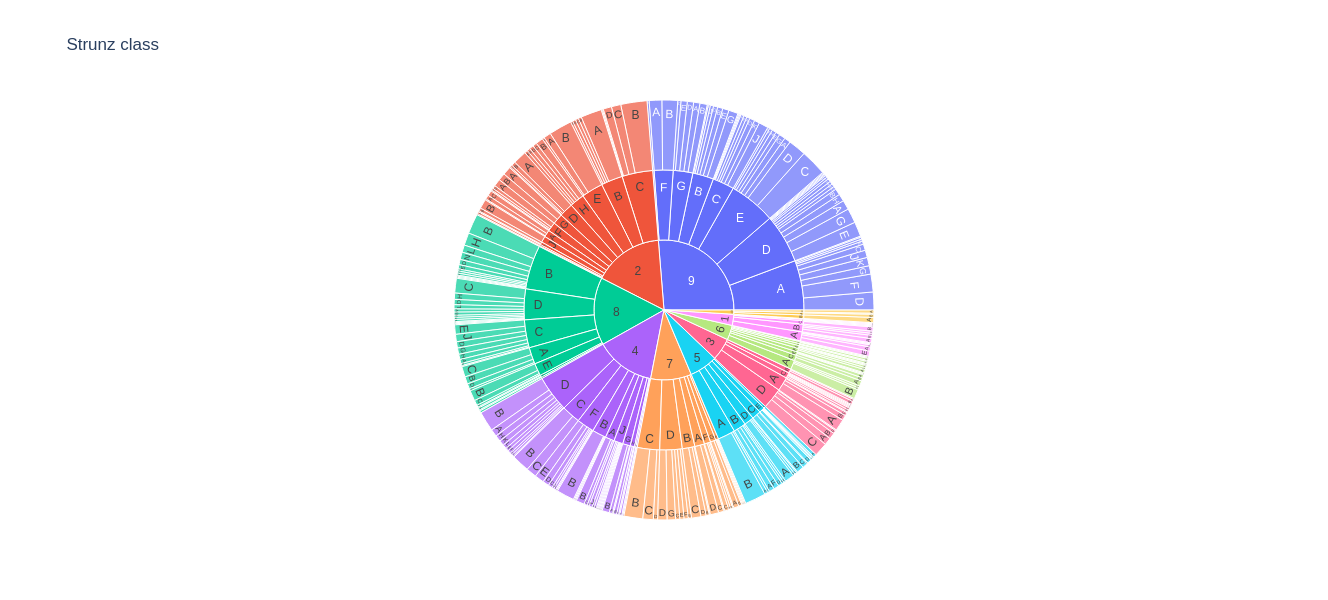

In [10]:
fig = px.sunburst(df, path=['strunz0', 'strunz1', 'strunz2'], height=600, title='Strunz class')
fig.show()

The same as treemap:

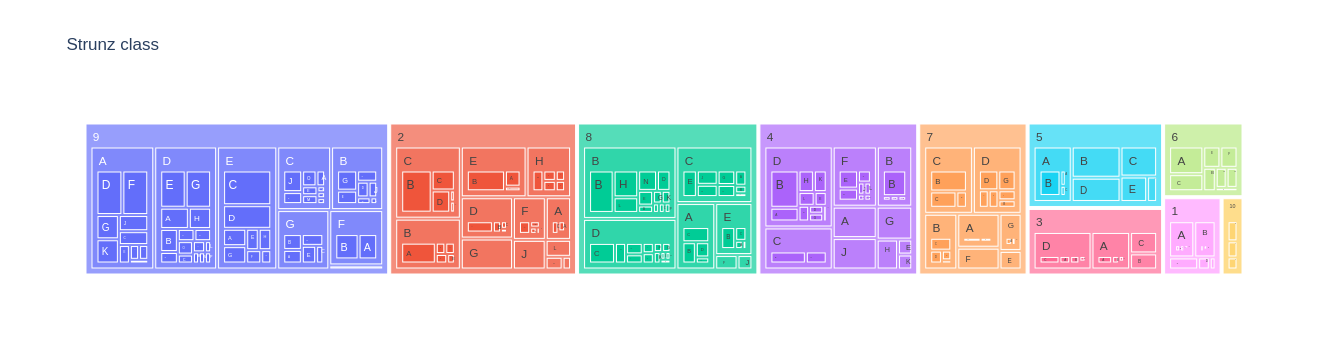

In [11]:
fig = px.treemap(df, path=['strunz0', 'strunz1', 'strunz2'], title='Strunz class')
fig.show()

Plot a histogram of the Strunz classes

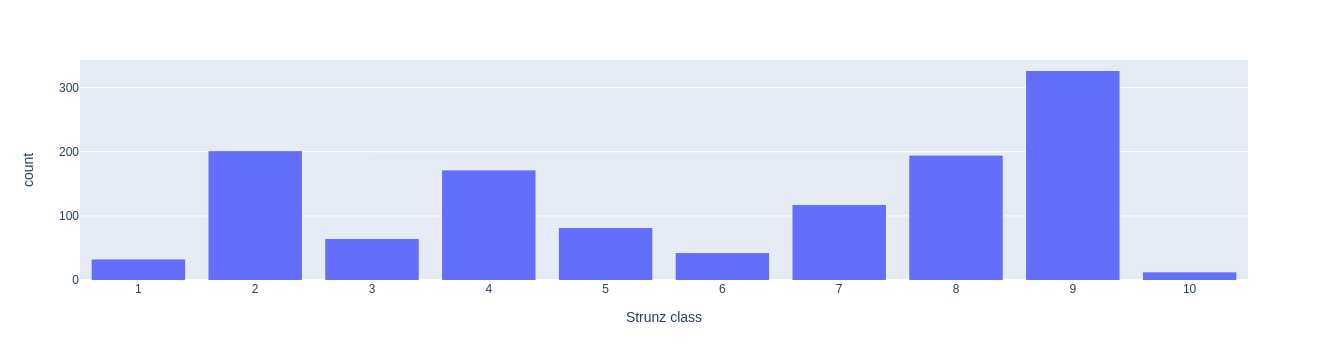

In [12]:
labels = {'strunz0': 'Strunz class'}
category_orders = {'strunz0': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']}
fig = px.histogram(df, x='strunz0', category_orders=category_orders, labels=labels)
fig.update_layout(xaxis_type='category')
fig.show()

## Crystal system and crystal class

We can do the same for crystal system/class. Note that the data is a bit messy, some minerals have values such as "Triclinic or hexagonal", "Monoclinic/possibly prismatic", "Unkown space group". However it is still good enough to get a broad picture.

In [13]:
df2 = minerals[['crystal system', 'crystal class']].dropna()

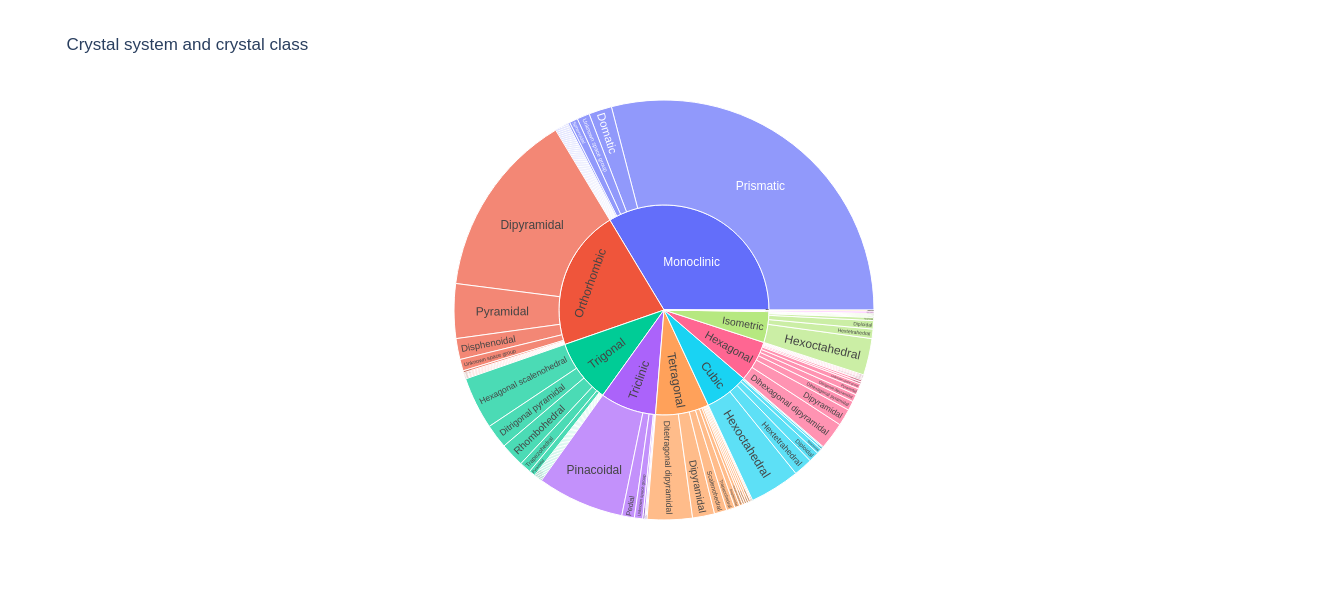

In [14]:
fig = px.sunburst(df2, path=['crystal system', 'crystal class'], height=600, title='Crystal system and crystal class')
fig.show()

## How do crystal system and Strunz class relate?
Strunz classes are based on chemistry, and it is obvious that there is a relationship of chemical composition and crystal lattice.

The next plot shows Strunz class in the center, surrounded by crystal system:

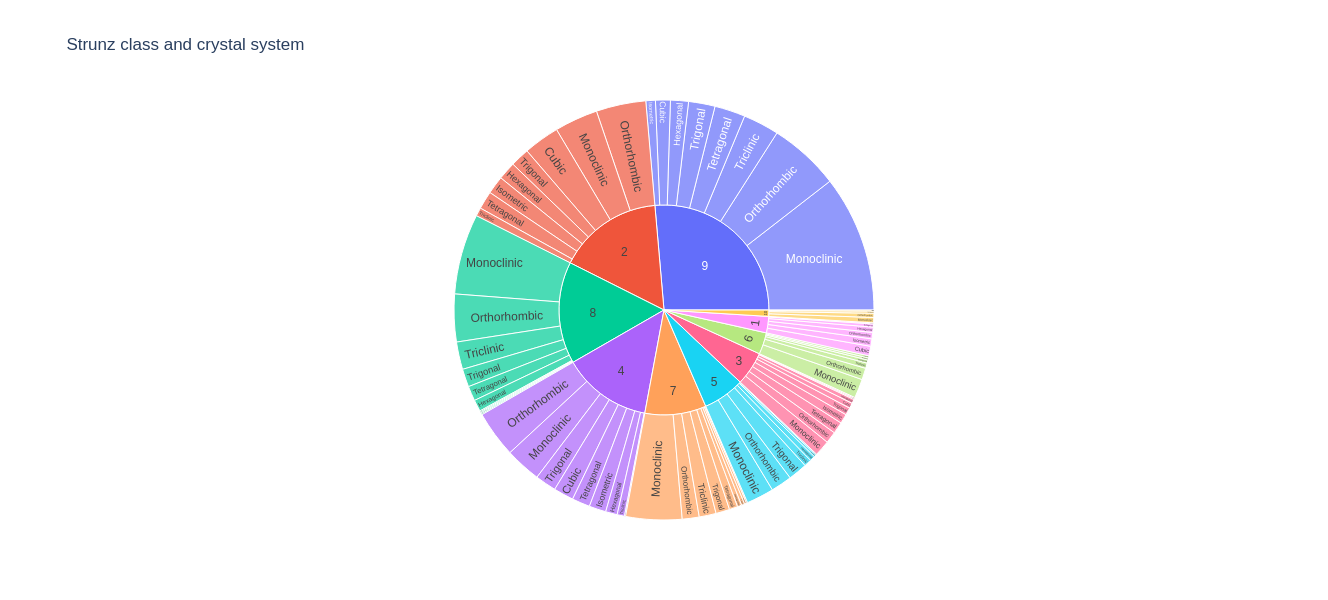

In [15]:
fig = px.sunburst(minerals[['strunz0', 'crystal system']].dropna(), path=['strunz0', 'crystal system'], height=600, title='Strunz class and crystal system')
fig.show()

Crystal system in the center, surrounded by Strunz class:

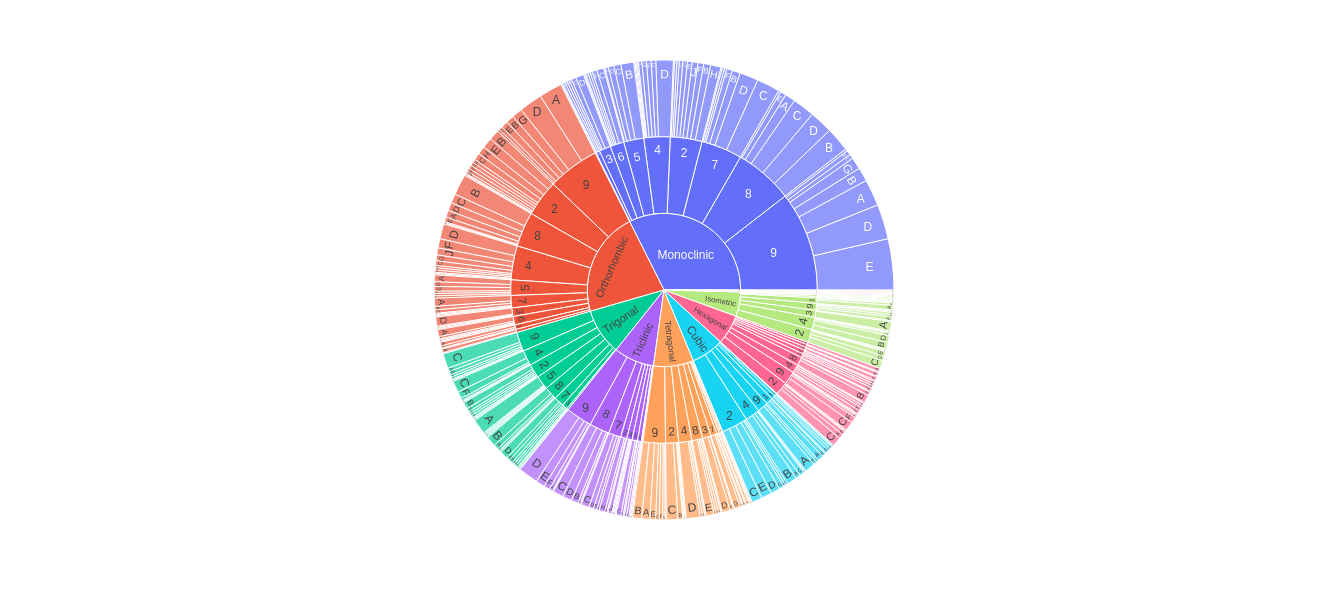

In [16]:
fig = px.sunburst(minerals[['strunz0', 'strunz1', 'crystal system']].dropna(), path=['crystal system', 'strunz0', 'strunz1'], height=600)
fig.show()

## Count the elements in the formula

In [17]:
def unique_elements(s):
    e = set(re.findall('[A-Z][a-z]?', s))
    return ", ".join(sorted(e))

minerals['elements'] = minerals[minerals['chemistry'].notnull()]['chemistry'].apply(lambda row: unique_elements(row))
minerals['count elements'] = minerals['elements'].str.count(r"[A-Z]")

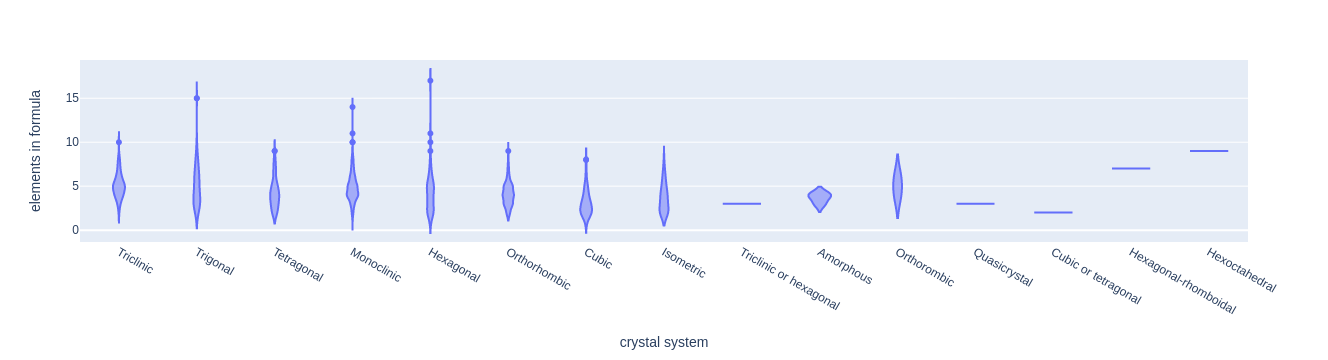

In [50]:
labels = {'strunz0': 'Strunz class', 'count elements': 'elements in formula', }

fig = px.violin(minerals[['count elements', 'crystal system', 'name', 'chemistry']].dropna(), 
                 x='crystal system', y='count elements', 
                 hover_data=['name', 'chemistry'], labels=labels)
fig.show()

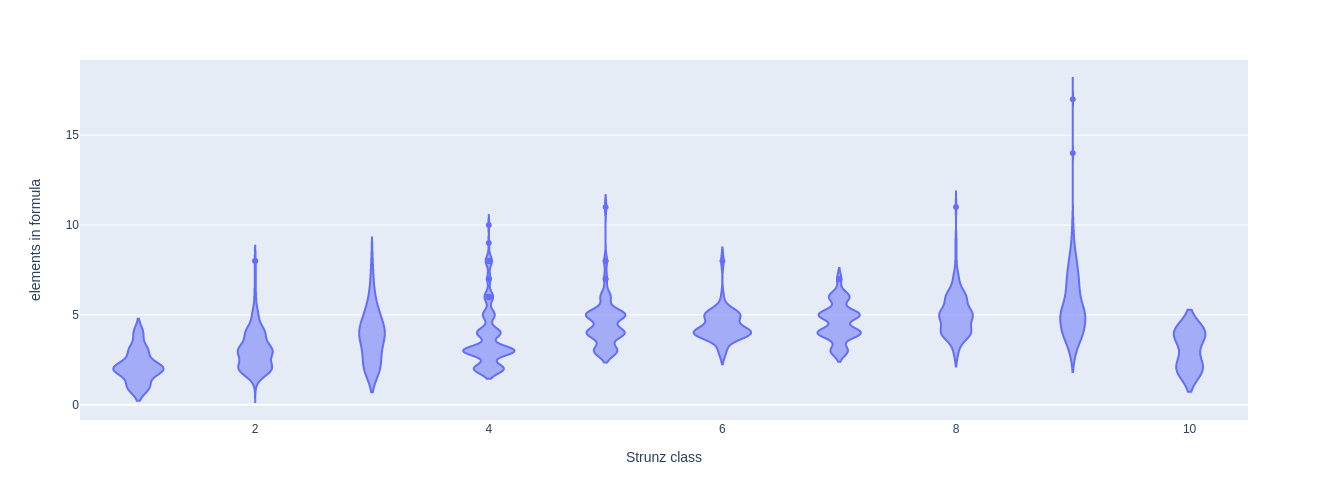

In [52]:
df = minerals[['count elements', 'strunz0', 'name', 'chemistry']].dropna()
df['strunz0'] = df['strunz0'].astype('int')



fig = px.violin(df, x='strunz0', y='count elements', labels=labels, hover_data=['name', 'chemistry'], category_orders=category_orders, height=500)
fig.show()

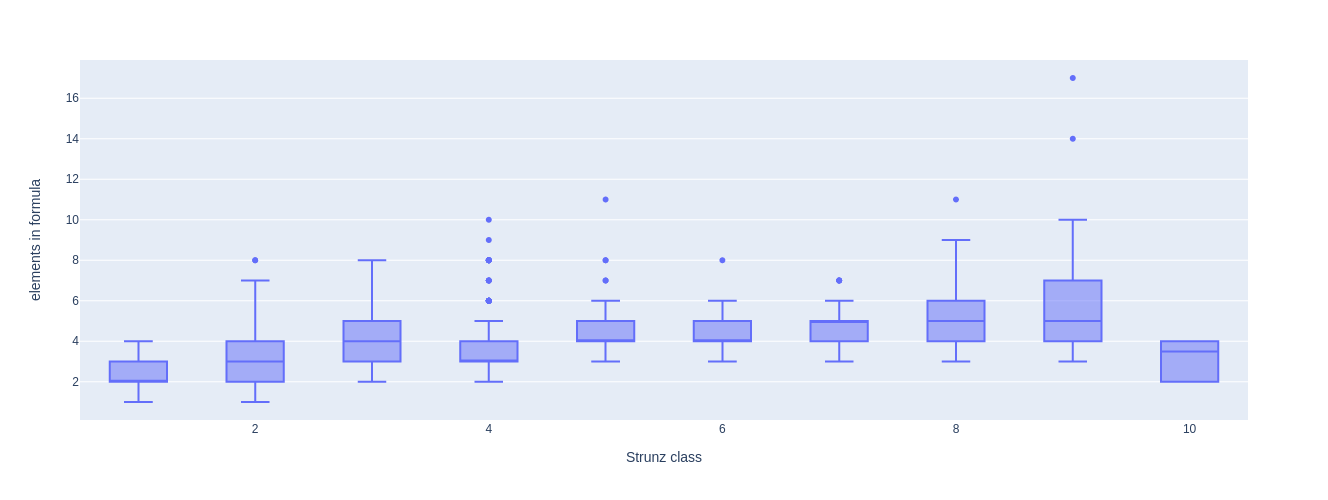

In [51]:
fig = px.box(df, x='strunz0', y='count elements', labels=labels, hover_data=['name', 'chemistry'], category_orders=category_orders, height=500)
fig.show()

## Mohs scale
We often have ranges of Mohs scale (hardness), however the format on Wikipedia is not uniform, we have values such as '2', '2.5–3', '4-5', ' 2.0 - 2.5', '3~4' or '3 to 4' in the dataset. I use a regular expression to get the minimum and maximum value.

In [20]:
mohs = minerals['mohs'].str.findall(r"([0-9]\.?[0-9]?[0-9]?)")

In [21]:
mohs

0         [2, 3]
1         [4, 5]
2       [2.5, 3]
3            [2]
4            NaN
          ...   
1422      [6, 7]
1423      [3, 4]
1424         [7]
1425         NaN
1426         NaN
Name: mohs, Length: 1427, dtype: object

In [22]:
def mohs_max(l):
    if type(l) is float:
        return l
    if len(l) == 0:
        return np.nan
    if len(l) > 1:
        return float(l[1])
    else:
        return float(l[0])

minerals['mohs_min'] = mohs.str[0].astype('float')
minerals['mohs_max'] = mohs.apply(lambda row: mohs_max(row))
minerals['mohs_avg'] = minerals['mohs_min'] + minerals['mohs_max'] / 2
minerals['mohs_delta'] = minerals['mohs_max'] - minerals['mohs_min']

In [23]:
minerals[['mohs', 'mohs_min', 'mohs_max', 'mohs_avg', 'mohs_delta']]

mohs  mohs_min  mohs_max  mohs_avg  mohs_delta
0        2–3       2.0       3.0       3.5         1.0
1        4-5       4.0       5.0       6.5         1.0
2      2.5–3       2.5       3.0       4.0         0.5
3          2       2.0       2.0       3.0         0.0
4        NaN       NaN       NaN       NaN         NaN
...      ...       ...       ...       ...         ...
1422  6 to 7       6.0       7.0       9.5         1.0
1423     3~4       3.0       4.0       5.0         1.0
1424       7       7.0       7.0      10.5         0.0
1425     NaN       NaN       NaN       NaN         NaN
1426     NaN       NaN       NaN       NaN         NaN

[1427 rows x 5 columns]

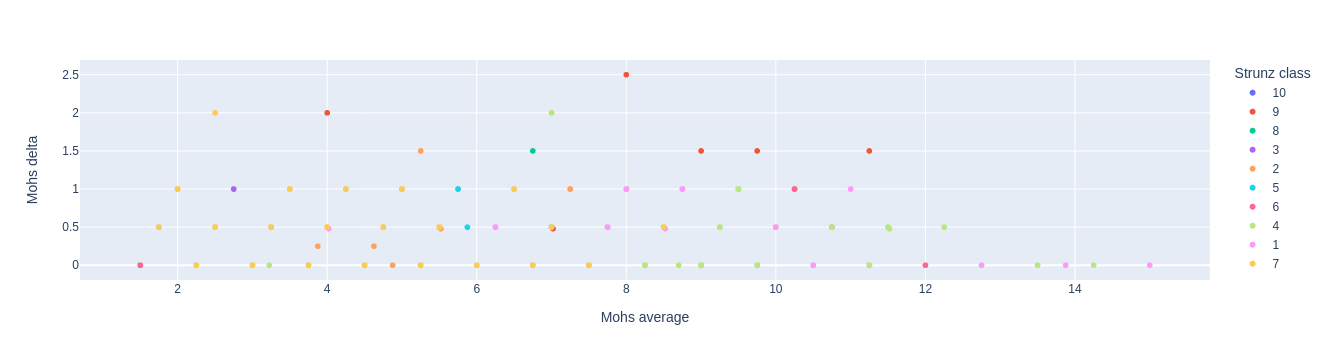

In [45]:
labels['mohs_avg'] = 'Mohs average'
labels['mohs_delta'] = 'Mohs delta'

fig = px.scatter(minerals[['strunz0', 'mohs', 'mohs_min', 'mohs_max', 'mohs_avg', 'mohs_delta', 'name']].dropna(), 
                 x='mohs_avg', y='mohs_delta', 
                 color='strunz0', 
                 hover_data=['name', 'mohs', 'mohs_min', 'mohs_max'], labels=labels)
fig.show()

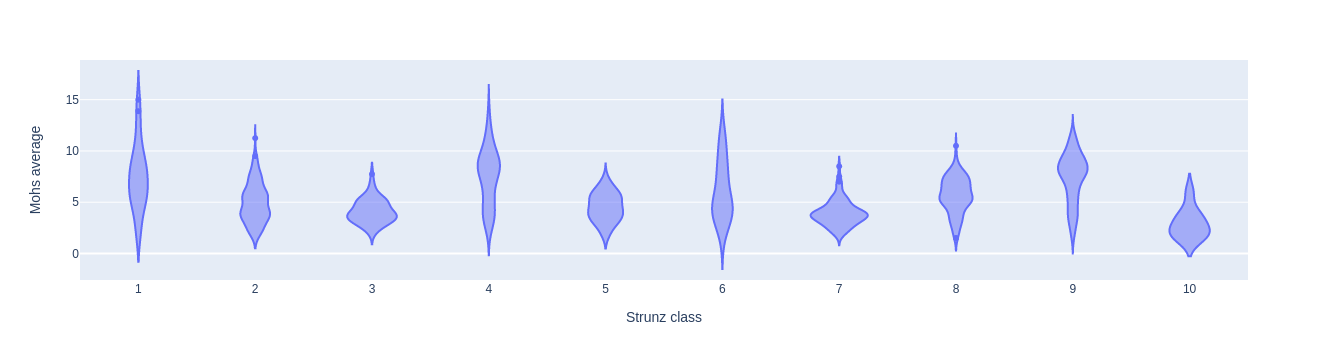

In [46]:
fig = px.violin(minerals[['strunz0', 'mohs', 'mohs_min', 'mohs_max', 'mohs_avg', 'mohs_delta', 'name']].dropna(), 
                y='mohs_avg', x='strunz0', 
                hover_data=['name', 'mohs', 'mohs_min', 'mohs_max'],
                category_orders=category_orders, labels=labels)
fig.show()

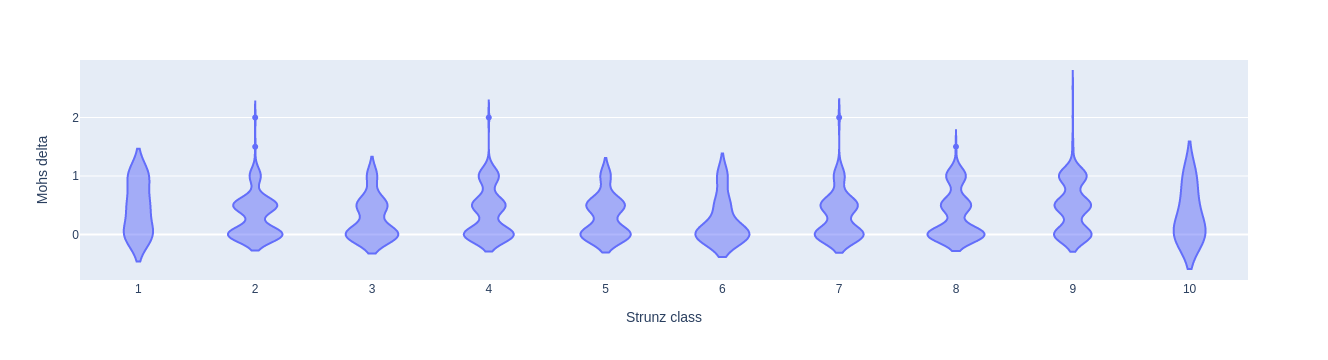

In [47]:
fig = px.violin(minerals[['strunz0', 'mohs', 'mohs_min', 'mohs_max', 'mohs_avg', 'mohs_delta', 'name']].dropna(), 
                y='mohs_delta', x='strunz0', 
                hover_data=['name', 'mohs', 'mohs_min', 'mohs_max'],
                category_orders=category_orders, labels=labels)
fig.show()

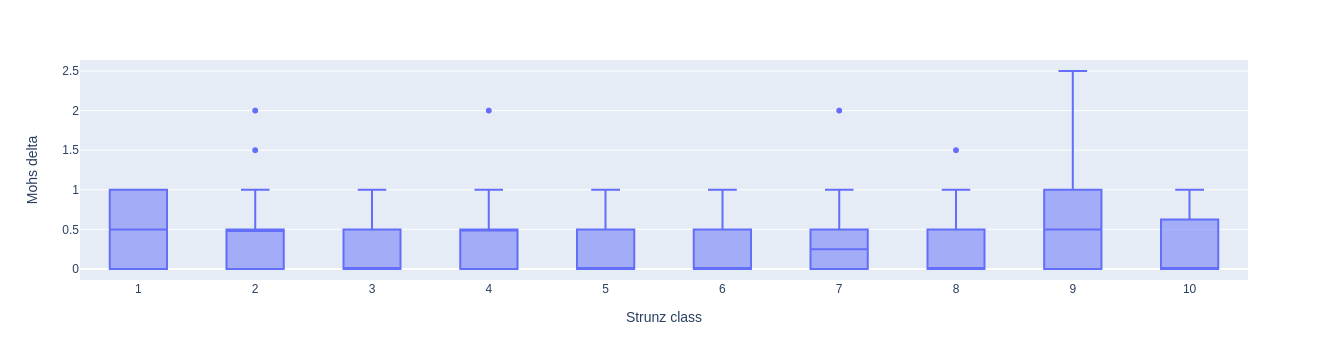

In [48]:
fig = px.box(minerals[['strunz0', 'mohs', 'mohs_min', 'mohs_max', 'mohs_avg', 'mohs_delta', 'name']].dropna(), 
                y='mohs_delta', x='strunz0', 
                hover_data=['name', 'mohs', 'mohs_min', 'mohs_max'],
                category_orders=category_orders, labels=labels)
fig.show()